<a href="https://colab.research.google.com/github/Shreyashgupta016/My-Projects/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem statement says that the renowned OTT platform, Netflix wants to increase its business in different countries. We are provided with the dataset which contains the movies and shows that are in Netflix. We have to analyse this data, generate insights on them and finally recommend those movies and shows that could help Netflix increase its profit in various countries.
To achieve this goal, we have to first find out what drives profit growth in Netflix. Profit growth is driven through 2 factors, increase in revenue or decrease in company costs or both. Here, the problem statement is that we have to find out those movies/shows that could help accelerate business of Netflix. This makes us rule out the 2nd factor of decreasing the costs, because if we are aiming to increase the business by particularly focusing on the production of specific shows and movies in different countries, then we have to spend extra on marketing and operations costs, and for that decreasing costs is not an option. Therefore, we have to focus on increasing revenue by acquiring new customers or by increasing customer retention or both.
To acquire new customers or to increase the customer retention rate, we have to figure out some critical aspects that affect the customer acquisition and retention. They are as follows:
	•	What type/genre of movies are generally seen and rated higher in various countries? What is the watch time of these movies?
	•	Which actors/actresses’ or director’s movies are preferred in various countries and globally?
	•	Is the global trend shifting towards series from movies? If yes, then what all countries are the forerunner in it?
	•	What type of movies/shows are watched by what age-group of people (demographics)? Also, what is the time each age-group of people spend on Netflix?
	•	How has the number of movies released per year changed over the years?

	•	Does seasonality affects the users on Netflix? If yes, then in which season/month Netflix record the largest number of subscriptions?
	•	What all shows are binge-watched on Netflix?
	•	Is there a possibility to enter new market/country?
	•	Does discount on festivals increase the user inflow?
	•	What are the evergreen shows i.e. shows that became superhit in the past?
We will try to find the answers of most of these questions (as per the limitations of the data) through our exploratory data analysis, and will build our insights accordingly.


In [ ]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
## Answer 2

In [ ]:
df.shape       # shape of the data (the dataset has 8807 rows and 12 columns)

(8807, 12)

In [ ]:
df.info()      # data types of all the features as well as the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include='all')        # Statistical summary of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum(axis=1)     # no. of null values in each row

0       1
1       1
2       1
3       3
4       1
       ..
8802    0
8803    3
8804    0
8805    0
8806    0
Length: 8807, dtype: int64

In [ ]:
df.isna().sum(axis=1).value_counts()    # this shows that there are a total of 5332 rows with 0 null values, 2741 rows with 1 null value, and so on...... 

0    5332
1    2741
2     636
3      98
dtype: int64

In [ ]:
df.isna().sum()          # no. of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])       # converting the 'data_added' column into datetime format
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
def func(x):
  if x=='Movie':
    return 'M'
  else:
    return 'TV'

df['type']=df['type'].apply(func)      # Categorizing Movies and TV Shows in 'M' and 'TV' category
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,M,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
## Answers 3,4,5

In [ ]:
k=df['cast'].apply(lambda x: str(x).split(', ')).tolist()     # converting the datatype (of column 'cast') from Series to list
df1=pd.DataFrame(k,index=df['title'])           
df1=df1.stack().reset_index()                                 # segregating multiple actors to one actor for every movie
df1.rename(columns={0:'Actor'}, inplace=True)
df1.drop(columns=['level_1'],inplace=True)
df1.replace('nan','Unknown Actor',inplace=True)
df1.head()

,title,Actor
0,Dick Johnson Is Dead,Unknown Actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
m=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df2=pd.DataFrame(m,index=df['title'])           
df2=df2.stack().reset_index()                                 # segregating multiple directors to one director for every movie
df2.rename(columns={0:'Director'}, inplace=True)
df2.drop(columns=['level_1'],inplace=True)
df2.replace('nan','Unknown Director',inplace=True)
df2.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown Director
4,Kota Factory,Unknown Director


In [ ]:
n=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3=pd.DataFrame(n,index=df['title'])           
df3=df3.stack().reset_index()                                 # segregating multiple genres to one genre for every movie
df3.rename(columns={0:'Genre'}, inplace=True)
df3.drop(columns=['level_1'],inplace=True)
df3.replace('nan','Unknown Genre',inplace=True)
df3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
p=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4=pd.DataFrame(p,index=df['title'])           
df4=df4.stack().reset_index()                                 # segregating multiple countries to one country for every movie
df4.rename(columns={0:'Country'}, inplace=True)
df4.drop(columns=['level_1'],inplace=True)
df4.replace('nan','Unknown Country',inplace=True)
df4.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown Country
3,Jailbirds New Orleans,Unknown Country
4,Kota Factory,India


In [ ]:
df14=pd.merge(df1,df4,on='title')        # merging df1 and df4 to get the actors wrt countries
df14.head()

,title,Actor,Country
0,Dick Johnson Is Dead,Unknown Actor,United States
1,Blood & Water,Ama Qamata,South Africa
2,Blood & Water,Khosi Ngema,South Africa
3,Blood & Water,Gail Mabalane,South Africa
4,Blood & Water,Thabang Molaba,South Africa


In [ ]:
df4['Country'].nunique()         # movies/tv shows of 128 countries are listed in this dataset

128

In [ ]:
top=df4['Country'].value_counts().head(11)         # top 10 countries with most movies/tv shows on Netflix
top

United States      3689
India              1046
Unknown Country     831
United Kingdom      804
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Mexico              169
Name: Country, dtype: int64

In [ ]:
print(' Sum of movies/tv shows produced by top 10 countries:', top.values.sum(),'\n',
      'Sum of movies/tv shows produced by all the countries', len(df4))

 Sum of movies/tv shows produced by top 10 countries: 8384 
 Sum of movies/tv shows produced by all the countries 10845


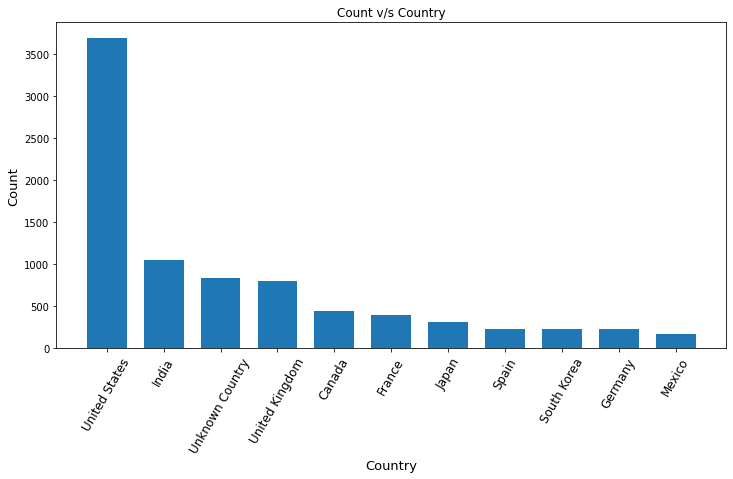

In [ ]:
# Bar plot for the top 10 countries with most movies/tv shows in Netflix
plt.figure(figsize=(12,6))
plt.bar(top.index, top, width=0.7)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Count v/s Country')
plt.xticks(rotation=60, fontsize=12)
plt.show()

In [ ]:
df14.loc[df14['Country']=='United States']['Actor'].value_counts().head()         # top 5 actors of United States

Unknown Actor        406
Samuel L. Jackson     22
Tara Strong           22
Fred Tatasciore       21
Adam Sandler          20
Name: Actor, dtype: int64

In [ ]:
df14.loc[df14['Country']=='India']['Actor'].value_counts().head()       # top 5 actors of India

Anupam Kher         40
Unknown Actor       39
Shah Rukh Khan      34
Naseeruddin Shah    31
Om Puri             29
Name: Actor, dtype: int64

In [ ]:
df14.loc[df14['Country']=='United Kingdom']['Actor'].value_counts().head()        # top 5 actors of United Kingdom

Unknown Actor         96
David Attenborough    17
John Cleese           16
Michael Palin         14
Terry Jones           12
Name: Actor, dtype: int64

In [ ]:
df14.loc[df14['Country']=='Canada']['Actor'].value_counts().head()       # top 5 actors of Canada

Unknown Actor         31
Robb Wells            14
John Paul Tremblay    14
Vincent Tong          12
Ashleigh Ball         12
Name: Actor, dtype: int64

In [ ]:
df14.loc[df14['Country']=='France']['Actor'].value_counts().head()       # top 5 actors of France

Unknown Actor         32
Wille Lindberg         5
Benoît Magimel         5
Patrick d'Assumçao     4
Liam Neeson            4
Name: Actor, dtype: int64

In [ ]:
df14.loc[df14['Country']=='Japan']['Actor'].value_counts().head()        # top 5 actors of Japan

Takahiro Sakurai    29
Yuki Kaji           28
Daisuke Ono         22
Junichi Suwabe      19
Kana Hanazawa       18
Name: Actor, dtype: int64

In [ ]:
df2['Director'].value_counts().head(11)        # count of 10 most popular directors in the dataset 

Unknown Director       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Youssef Chahine          12
Name: Director, dtype: int64

In [ ]:
df34=pd.merge(df3,df4,on='title')             # merging df3 and df4 to get the genres wrt countries
df34.head()

,title,Genre,Country
0,Dick Johnson Is Dead,Documentaries,United States
1,Blood & Water,International TV Shows,South Africa
2,Blood & Water,TV Dramas,South Africa
3,Blood & Water,TV Mysteries,South Africa
4,Ganglands,Crime TV Shows,Unknown Country


In [ ]:
# most popular genre in each of the top 10 countries that have most movies/tv shows listed in Netflix
US_Genre=df34.loc[df34['Country']=='United States']['Genre'].mode()[0]
India_Genre=df34.loc[df34['Country']=='India']['Genre'].mode()[0]
UK_Genre=df34.loc[df34['Country']=='United Kingdom']['Genre'].mode()[0]
Canada_Genre=df34.loc[df34['Country']=='Canada']['Genre'].mode()[0]
France_Genre=df34.loc[df34['Country']=='France']['Genre'].mode()[0]
Japan_Genre=df34.loc[df34['Country']=='Japan']['Genre'].mode()[0]
Spain_Genre=df34.loc[df34['Country']=='Spain']['Genre'].mode()[0]
SK_Genre=df34.loc[df34['Country']=='South Korea']['Genre'].mode()[0]
Germany_Genre=df34.loc[df34['Country']=='Germany']['Genre'].mode()[0]
Mexico_Genre=df34.loc[df34['Country']=='Mexico']['Genre'].mode()[0]
print(' United States:', US_Genre, '\n',
      'India:', India_Genre, '\n',
      'United Kingdom:', UK_Genre, '\n',
      'Canada:', Canada_Genre, '\n',
      'France:', France_Genre, '\n',
      'Japan:', Japan_Genre, '\n',
      'Spain:', Spain_Genre, '\n',
      'Germany:', Germany_Genre, '\n',
      'Mexico:', Mexico_Genre)

 United States: Dramas 
 India: International Movies 
 United Kingdom: British TV Shows 
 Canada: Comedies 
 France: International Movies 
 Japan: International TV Shows 
 Spain: International Movies 
 Germany: International Movies 
 Mexico: International Movies


In [ ]:
df_movies=df3.merge(df,on='title').loc[df3.merge(df,on='title')['type']=='M']       # extracting movies after merging dataset df3 with the original dataset df
df_movies.drop(columns='listed_in',inplace=True)
df_movies.head()

,title,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Documentaries,s1,M,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
15,My Little Pony: A New Generation,Children & Family Movies,s7,M,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...
16,Sankofa,Dramas,s8,M,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s..."
17,Sankofa,Independent Movies,s8,M,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s..."
18,Sankofa,International Movies,s8,M,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s..."


In [ ]:
df_movies['Genre'].value_counts()        # Count of the popular movie genres in Netflix

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: Genre, dtype: int64

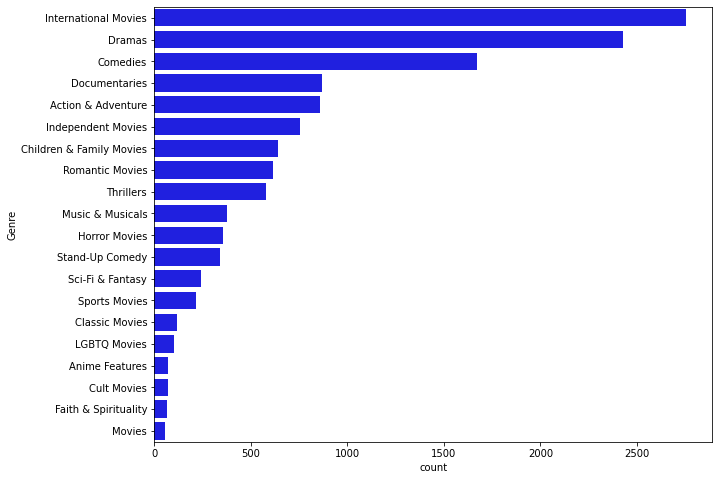

In [ ]:
# Countplot to visualize the count of popular genre wrt movies in Netflix
plt.figure(figsize=(10,8))
sns.countplot(data=df_movies, 
              y=df_movies['Genre'], 
              order=df_movies['Genre'].value_counts().index,
              color='blue')
plt.show()

In [ ]:
df_tv=df3.merge(df,on='title').loc[df3.merge(df,on='title')['type']=='TV']       # extracting TV shows after merging dataset df3 with the original dataset df
df_tv.drop(columns='listed_in',inplace=True)
df_tv.head()

,title,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,description
1,Blood & Water,International TV Shows,s2,TV,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,TV Dramas,s2,TV,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,TV Mysteries,s2,TV,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Ganglands,Crime TV Shows,s3,TV,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
5,Ganglands,International TV Shows,s3,TV,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...


In [ ]:
df_tv['Genre'].value_counts()          # Count of the popular tv shows genres in Netflix

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: Genre, dtype: int64

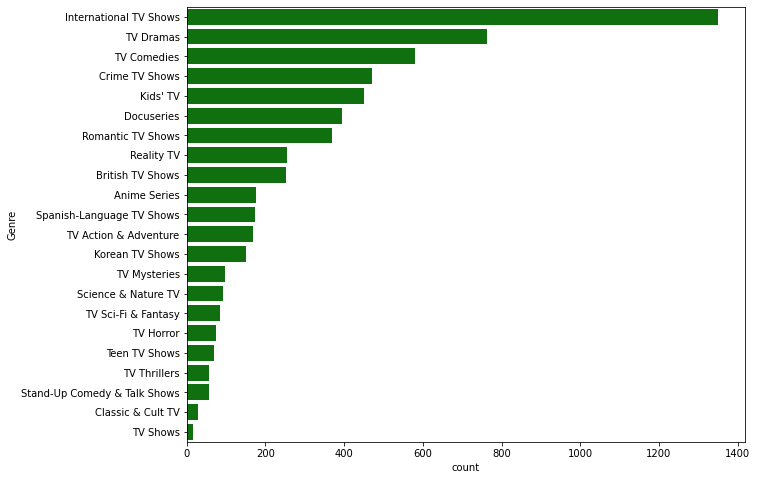

In [ ]:
# Countplot to visualize the count of popular genre wrt tv shows in Netflix
plt.figure(figsize=(10,8))
sns.countplot(data=df_tv, 
              y=df_tv['Genre'], 
              order=df_tv['Genre'].value_counts().index,
              color='green')
plt.show()

In [ ]:
# Merging all the individual datasets(df1, df2, df3, df4) with the original dataset
df_new=df.merge(df1.merge(df2, on='title').merge(df3, on='title').merge(df4, on='title'))
df_new.drop(columns=['cast','country','director','listed_in'],inplace=True)
df_new.head()

,show_id,type,title,date_added,release_year,rating,duration,description,Actor,Director,Genre,Country
0,s1,M,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,Documentaries,United States
1,s2,TV,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,International TV Shows,South Africa
2,s2,TV,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,TV Dramas,South Africa
3,s2,TV,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,s2,TV,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [ ]:
df['type'].value_counts()              # total no. of Movies and TV shows in the dataset

M     6131
TV    2676
Name: type, dtype: int64

In [ ]:
df.loc[df['release_year']<2010]['type'].value_counts()       # total no. of Movies and TV shows produced before 2010

M     1153
TV     182
Name: type, dtype: int64

In [ ]:
df.loc[df['release_year']>=2010]['type'].value_counts()       # total no. of Movies and TV shows produced after 2010

M     4978
TV    2494
Name: type, dtype: int64

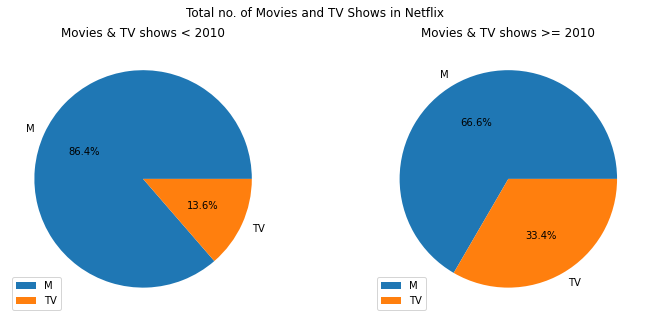

In [ ]:
# Piechart to visualize the percentage distribution of no. of movies and tv shows produced before and after 2010 that were added in the Netflix dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df.loc[df['release_year']<2010]['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Movies & TV shows < 2010')
plt.legend(loc='lower left')

plt.subplot(1,2,2)
plt.pie(df.loc[df['release_year']>=2010]['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Movies & TV shows >= 2010')
plt.legend(loc='lower left')

plt.suptitle('Total no. of Movies and TV Shows in Netflix')
plt.show()

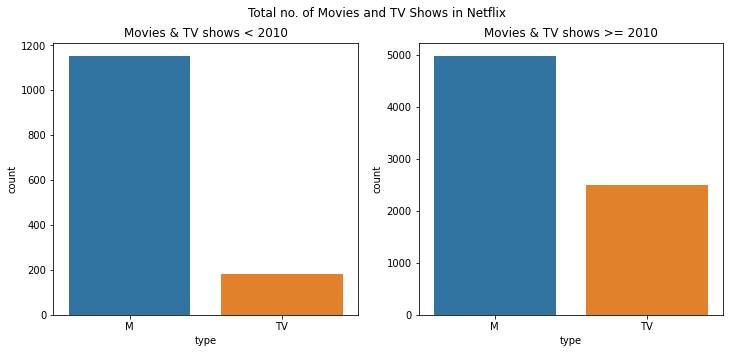

In [ ]:
# Visualizing no. of Movies and TV shows produced before and after 2010 that were added in the Netflix dataset
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df.loc[df['release_year']<2010][['type']], x='type')
plt.title('Movies & TV shows < 2010')

plt.subplot(1,2,2)
sns.countplot(data=df.loc[df['release_year']>=2010][['type']], x='type')
plt.title('Movies & TV shows >= 2010')

plt.suptitle('Total no. of Movies and TV Shows in Netflix')
plt.show()

In [ ]:
df_movies.loc[df_movies['release_year']<2000]['Genre'].value_counts()      # count of popular genres of movies before the year 2000

Dramas                      211
International Movies        163
Comedies                    152
Action & Adventure          138
Classic Movies              115
Cult Movies                  45
Romantic Movies              44
Independent Movies           37
Children & Family Movies     36
Music & Musicals             30
Documentaries                27
Thrillers                    26
Horror Movies                21
Sci-Fi & Fantasy             19
Sports Movies                14
Stand-Up Comedy              14
Anime Features                7
LGBTQ Movies                  3
Movies                        1
Name: Genre, dtype: int64

In [ ]:
df_movies.loc[df_movies['release_year']>=2000]['Genre'].value_counts()      # count of popular genres of movies after the year 2000

International Movies        2589
Dramas                      2216
Comedies                    1522
Documentaries                842
Action & Adventure           721
Independent Movies           719
Children & Family Movies     605
Romantic Movies              572
Thrillers                    551
Music & Musicals             345
Horror Movies                336
Stand-Up Comedy              329
Sci-Fi & Fantasy             224
Sports Movies                205
LGBTQ Movies                  99
Faith & Spirituality          65
Anime Features                64
Movies                        56
Cult Movies                   26
Classic Movies                 1
Name: Genre, dtype: int64

In [ ]:
df_tv.loc[df_tv['release_year']<2000]['Genre'].value_counts()           # count of popular genres of tv shows before the year 2000 

Kids' TV                     17
TV Comedies                  13
Classic & Cult TV             8
International TV Shows        6
Anime Series                  6
TV Shows                      5
TV Dramas                     5
British TV Shows              4
TV Sci-Fi & Fantasy           4
Docuseries                    4
Teen TV Shows                 2
Reality TV                    2
TV Action & Adventure         2
Crime TV Shows                2
TV Thrillers                  1
Spanish-Language TV Shows     1
Name: Genre, dtype: int64

In [ ]:
df_tv.loc[df_tv['release_year']>=2000]['Genre'].value_counts()           # count of popular genres of tv shows after the year 2000 

International TV Shows          1345
TV Dramas                        758
TV Comedies                      568
Crime TV Shows                   468
Kids' TV                         434
Docuseries                       391
Romantic TV Shows                370
Reality TV                       253
British TV Shows                 249
Spanish-Language TV Shows        173
Anime Series                     170
TV Action & Adventure            166
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               80
TV Horror                         75
Teen TV Shows                     67
TV Thrillers                      56
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 20
TV Shows                          11
Name: Genre, dtype: int64

In [ ]:
df_m=df.loc[df['type']=='M']                                   # subset of an original dataset with only movies as its type
df_m['duration']=df_m['duration'].str.replace('min','')        # removing min in the duration column
df_m['duration'].fillna(0, inplace=True)                       # filling null values with 0 
df_m['duration']=df_m['duration'].astype(int)                  # converting the object datatype into integer datatype
df_m.replace(0, int(df_m['duration'].mean()), inplace=True)    # replacing 0 with the mean value of the duration column
df_m.head()

<ipython-input-31-7aa53c580e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['duration']=df_m['duration'].str.replace('min','')        # removing min in the duration column
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-31-7aa53c580e79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,M,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,M,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,M,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,M,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,M,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_m['duration'].mean()

99.57690425705431

In [ ]:
df_m['duration'].median()

98.0

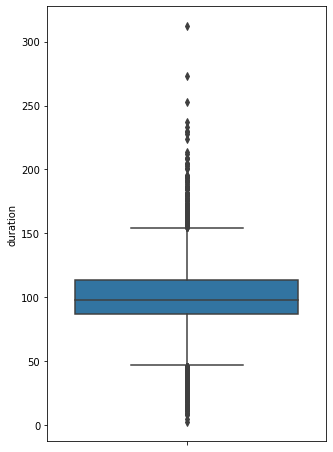

In [ ]:
# Boxplot to visualize the quartiles and outliers wrt duration of movies in the dataset
plt.figure(figsize=(5,8))
sns.boxplot(data=df_m, y='duration')
plt.show()

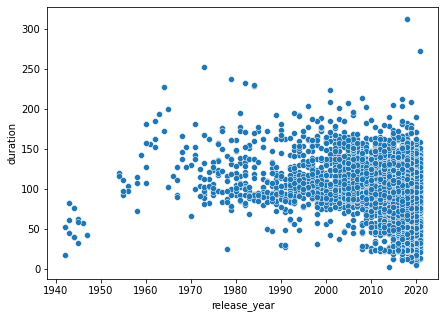

In [ ]:
# Scatterplot to visualize the duration of movies since 2021
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_m, x='release_year', y='duration')
plt.show()

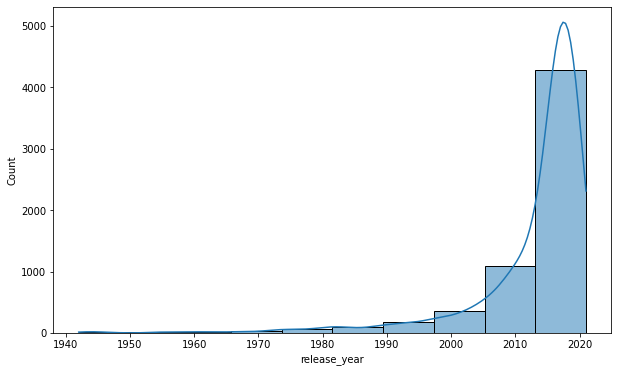

In [ ]:
# Histogram to show the distribution of movies produced since 1942 
plt.figure(figsize=(10,6))
sns.histplot(df_m['release_year'], kde=True, bins=10)
plt.show()

In [ ]:
df_s=df.loc[df['type']=='TV']                                                          # subset of an original dataset with only TV shows as its type
df_s['duration']=df_s['duration'].str.replace('Season','').str.replace('s','')         # removing Season/s in the duration column
df_s['duration'].fillna(0, inplace=True)                                               # filling null values with 0 
df_s['duration']=df_s['duration'].astype(int)                                          # converting the object datatype into integer datatype
df_s.head()

<ipython-input-34-6fb8fc9dde2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['duration']=df_s['duration'].str.replace('Season','').str.replace('s','')         # removing Season/s in the duration column
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-34-6fb8fc9dde2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_s['duration'].value_counts()            # count of tv shows wrt their no. of seasons

1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: duration, dtype: int64

In [ ]:
df_s['duration'].median()

1.0

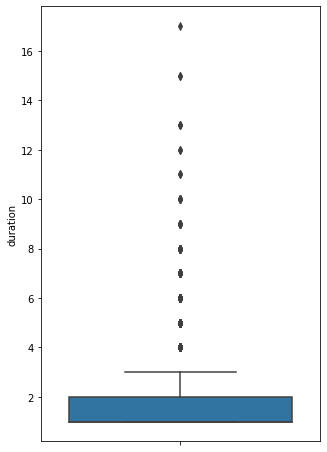

In [ ]:
# Boxplot to visualize the quartiles and outliers wrt duration of tv shows in the dataset
plt.figure(figsize=(5,8))
sns.boxplot(data=df_s, y='duration')
plt.show()

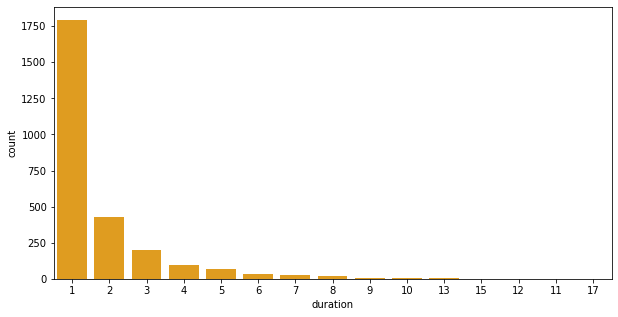

In [ ]:
# Countplot to visualize the count of tv shows wrt their number of seasons
plt.figure(figsize=(10,5))
sns.countplot(data=df_s, 
              x=df_s['duration'], 
              order=df_s['duration'].value_counts().index,
              color='orange')
plt.show()

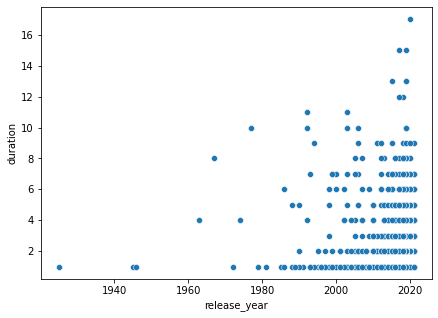

In [ ]:
# Scatterplot to visualize the duration of tv shows since 2021
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_s, x='release_year', y='duration')
plt.show()

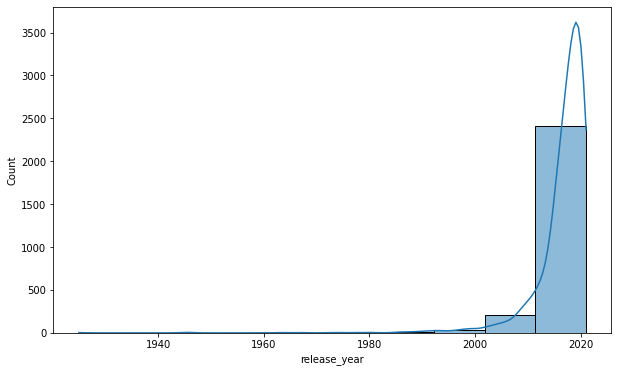

In [ ]:
# Histogram to show the distribution of tv shows produced since 1925 
plt.figure(figsize=(10,6))
sns.histplot(df_s['release_year'], kde=True, bins=10)
plt.show()

In [ ]:
df['date_added'].value_counts().head(50)     # Count of the top 50 days when the most number of movies and TV shows were added in the Netflix

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     62
2018-11-01     60
2021-07-01     60
2021-09-01     56
2018-01-01     55
2019-07-01     52
2021-06-02     51
2021-01-01     49
2017-10-01     47
2018-04-01     44
2020-04-01     43
2017-07-01     42
2018-05-01     42
2019-02-01     41
2018-07-01     40
2017-08-01     40
2021-07-06     39
2017-09-01     38
2021-08-01     38
2019-01-01     37
2018-08-01     37
2017-06-01     33
2020-11-01     33
2016-01-01     33
2020-10-01     33
2017-11-01     33
2021-05-01     33
2021-04-01     32
2017-03-31     31
2019-09-01     31
2019-11-20     30
2019-03-01     30
2019-12-15     29
2020-07-05     29
2018-12-01     29
2020-12-01     28
2019-04-01     28
2018-12-31     27
2019-12-01     27
2017-04-01     27
2021-08-27     27
2017-12-01     26
2019-08-01     26
2020-09-01     26
2018-08-02     25
Name: date_added, dtype: int64

In [ ]:
df['date_added'].value_counts().head(50).values.sum()

2100

In [ ]:
dfk=df['date_added'].dropna()            
len(dfk[(dfk.dt.month==1) & (dfk.dt.day==1)])       # number of movies and TV shows that were added on 1st January

304

In [ ]:
df['rating'].value_counts()                         # count of popular ratings for the movies/tv shows in the dataset

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

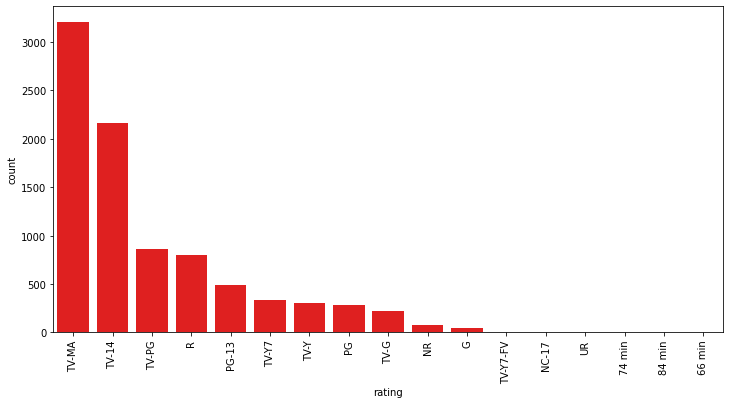

In [ ]:
# Countplot to visualize the count of popular ratings for the movies/tv shows in the dataset
plt.figure(figsize=(12,6))
sns.countplot(data=df, 
              x=df['rating'], 
              order=df['rating'].value_counts().index,
              color='red')
plt.xticks(rotation=90)
plt.show()

As we read the csv dataset, we first ran through the basic info, which gives the number of non null-values of each variable in the dataset, followed by the statistical summary. Then, we computed the number of null-values in each datapoint and variable. To make data usable for the calculations regarding date and time, we converted the datatype of the column ‘date_added’ from object to datetime using pd.to_datetime() function. We categorized the ‘Movies’ to ‘M’ and ‘TV Show’ to ‘TV’ in the ‘type’ column.
The next step includes the unnesting of the data into separate columns such as Actor, Director, Genre, Country, etc. For this, we first converted the corresponding columns of the original dataset into list, and then we stored it into an another data frame with index  being the ‘title’ column of the original dataset. This synchronizes the index values with the list values, both of them being equal in size. Then, we segregated the multiple list elements to 1 element for every index value using stack() method, followed by renaming the columns, dropping the unwanted columns, and replacing the NaN values with unknowns to finally get our 4 required datasets for each separate feature.
We merged the actor subset with the country subset through merge() method to get actors with respect to countries (df14), so that we can find out the top actors/actresses of each of the most popular countries listed in the dataset. We also computed the top 10 countries with most number of movies listed using value_counts() method, and visualized it with the bar-plot. Then we merged the genre subset with the country subset and named it df34 to find out the most popular genres in the 10 most popular countries. Then we calculated the most popular genre in each of the two types i.e. movies and tv shows, and how it is changed over the past 10-20 years. We visualized this data using count-plot. We also visualized the percent increase in the release of movies and tv shows after 2010 using count-plot.
We converted the datatype of ‘duration’ column to int after removing the string characters, and filled the null values with the mean of the Series using fillna() method. We created separate movies and tv shows dataset because of the non uniformity in their duration time. The movies’ duration is measured in minutes, and the tv shows’ duration is measured in seasons. So, they need to separated to achieve uniformity in the dataset. We computed quartiles and outliers using Box plots and plotted correlation of duration and years using Scatterplot. We then plotted histograms to figure out the frequencies of movies and tv shows released in each decade starting from 1930s. We also visualized the most common length of the tv shows in terms of seasons using count-plot. 
Netflix has added the movies and tv shows on certain dates. We calculated the top 50 most occurring dates when Netflix has added the data. This will tell us the best time to add any movie/tv show. Finally, we plotted a count-plot to visualize popular ratings in the dataset which are given to movies and tv shows.

Business Insights:

From the given dataset, we can draw some interesting business insights that will help Netflix increase their business in various countries. The dataset requires us to study the movies and tv shows along with other features that can drive the growth of Netflix.
As per our analysis, the top 10 countries which produces majority of movies and tv shows are United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico, in the descending order. To drive the strong business growth, it is important to consider these 10 countries on priority as majority of the movies and tv shows are produced by these countries.
The popular known actors/actresses are:
	•	United States - Samuel L. Jackson, Tara Strong, Fred Tatasciore, Adam Sandler 
	•	India - Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Om Puri
	•	United Kingdom - David Attenborough, John Cleese, Michael Palin, Terry Jones
	•	Canada - Robb Wells, John Paul Tremblay, Vincent Tong, Ashleigh Ball
	•	France - Wille Lindberg, Benoît Magimel, Patrick d'Assumçao, Liam Neeson
	•	Japan - Takahiro Sakurai, Yuki Kaji, Daisuke Ono, Junichi Suwabe, Kana Hanazawa
Similarly, the most popular genre in these countries are:
	•	United States - Dramas
	•	India - International Movies
	•	United Kingdom - British TV Shows
	•	Canada - Comedies
	•	France - International Movies
	•	Japan - International TV Shows
	•	Spain - International Movies
	•	Germany - International Movies
	•	Mexico - International Movies
The most popular movie genre is International Movies. This is because many countries such as India, France, etc. tag multiple genres (one of them is International Movies) to their movies so that they can attract global audience quickly. The International Movies is followed by Dramas, Comedies, mainly because the North American audience like movies such as The Godfather, The Fallout, The Social Network, Gone Girl, etc. Therefore, most of the movies in these countries are of the above genres. The least released genres are Cult Movies, LGBTQ Movies, Faith & Spirituality, etc. as people avoid watching these type of movies. The same principles are followed for tv shows as well.
The number of movies and tv shows released before 2010 were 1153 and 182, but after 2010 these numbers were 4978 and 2494. Although these is a sharp increase of 4x in the number of movies released before and after 2010, the mammoth increase came in the number of tv shows released, that went up by 14x. This shows that the users are finding tv shows as their means of entertainment and leisure when compared with movies. Alternatively, the international movies which were second most released genre in movies before the year 2000 became the most released genre after the year 2000 overtaking dramas. Similarly, the international TV shows which had only 6 shows before 2000, suddenly became the most popular genre of tv shows after 2000 with 1345 shows. This is due to the expansion of internet and rise of OTT platforms after 2007 which made the access of foreign shows easier to everyone.
The average duration of movies on Netflix is approximately 100 minutes, and the median being 98 minutes, which has largely been constant throughout, although there have been many outliers. Same is the case with tv shows, as almost 67% of all the tv shows are of 1 season. There has been a tremendous rise in the release of movies and tv shows after 2010 as depicted by the 2 histograms. The reason being diversification of screen, which means that the addition of streaming platforms, faster network, cheap and accessible internet, that filled the user’s pocket with many options and therefore producers capitalized on it by making more number of movies all over the world.
Most of the movies and tv shows were added in Netflix in the first week of every month, and about 304 movies and tv shows were added on 1st January, marking the festive season as user density is higher during that time of the year. We have extracted the top 50 dates on which the movies and tv shows were added to the Netflix. Almost 2100 (24%) of them were added on 1st of every month. This shows that the existing users renew their subscription and new users join in on the beginning of each month to have a clean chit of their subscription history. Festivals also play a big role as the second half of the year endorses many festivals and therefore we can see that the first week of every month of the second half of any given year has seen major additions.
Ratings are also very important in the success of the movies and tv shows. Majority of the movies and tv shows in the dataset has received TV for mature audience rating, followed by TV for children above 14 years of age, and TV for parental guidance recommended. This means that the movies or tv shows in Netflix are mostly not suited for kids.

Recommendations:

To improve business, it is required that the Netflix should focus on the top 10 countries which produces 77% of the total movies and tv shows as per the audience preferences. This is the area from where the maximum business can flow in.
The Netflix should add more movies and tv shows that employ the actors/actresses who have worked the most, as these celebrities have a huge fan base in those specific countries and will attract larger audience, especially US where actors like Samuel L. Jackson, Tara Strong, Adam Sandler not only attracts home crowd but the foreign crowd as well due to the commonality of English language in many countries. Similarly Anupam Kher who has been a seasoned actor and Shahrukh Khan who rules Bollywood industry. Apart from that, it is recommended to add more movies and tv shows of particular genres that are being produced the most in individual countries such as the tag of International Movies in India, for example ‘My Name is Khan’, which is a Shahrukh Khan movie was a blockbuster hit.
The focus has been rapidly shifting from movies to the tv shows in the recent years, which is also supported by our analysis, as we saw almost 1270% increase in the production of new tv shows after 2010. These shows need not be very long but short, primarily of 1 season or such. TV Shows today are creating a sense of connectivity more than the movies and as a result people are focusing on these shows more. At the same time, it is also recommended that we add International TV Shows more because of their rapid rise in the past 20 years.
We should offer some discounts during the festival season especially during the New Year’s time as we can see from the data that most of the addition of movies are done during this time of the year. The discounts or subsidies will greatly increase the user flow and will add more people during the festivals’ time especially in the second half of the year. Also, ratings matter a lot in movies business. Therefore, it is recommended to prioritize adding those movies/tv shows which are mostly suited to individuals above 14 years of age, as the highest rating for most of the movies/tv shows are TV-MA.